In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_data = pd.read_csv("C:\\Users\\krish.HP.000\\Downloads\\Data (1).csv", parse_dates=["Timestamp"])
df_state = pd.read_csv("C:\\Users\\krish.HP.000\\Downloads\\State_data.csv")
df_funding = pd.read_csv("C:\\Users\\krish.HP.000\\Downloads\\NCAP_Funding.csv")

# Spatial aggregation

Question 1

In [108]:
df = df_data
df=df.dropna()
state_avg=df.groupby('state')['PM2.5'].mean()
highest_state = state_avg.idxmax()
highest_value = state_avg.max()
print(highest_value,highest_state)

102.56520664689529 Delhi


Question 2

In [109]:
df = df_data
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date  
df['Year'] = pd.to_datetime(df['Timestamp']).dt.year  
df_2023 = df[(df['Year'] == 2023) & (df['PM2.5'] > 300)]
state_counts = df_2023.groupby('state')['Date'].count()
most_hazardous_state = state_counts.idxmax()
hazardous_days = state_counts.max()
print(most_hazardous_state,":",hazardous_days)

Delhi : 470


Question 3

In [110]:
df = df_data
variablity = df.groupby('state')['PM2.5'].std()
print(variablity.idxmax(),":",variablity.max())

Delhi : 84.55345160960931


Question 4

In [111]:
df = df_data
df['Year'] = pd.to_datetime(df['Timestamp']).dt.year  
state_avg = df[(df['Year'] >= 2020) & (df['Year'] <= 2021)].groupby('state')['PM2.5'].mean()
print(state_avg.idxmin(), state_avg.min())

Mizoram 14.323350150801287


# Temporal Aggregation

Question 1

In [112]:
df = df_data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
aug_2020 = df[(df['Timestamp'].dt.year == 2020) & (df['Timestamp'].dt.month == 8)]
high_station = aug_2020.loc[aug_2020['PM2.5'].idxmax(), 'station']
print(high_station)

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


Question 2

In [113]:
data = df_data
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data2018 = data[data['Timestamp'].dt.year == 2018].copy()
stations = ['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
data2018 = data2018[data2018['station'].isin(stations)]
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Other'
data2018['Season'] = data2018['Timestamp'].apply(get_season)
avgBySeason = data2018.groupby('Season')['PM2.5'].mean()
print(avgBySeason.idxmax(),":",avgBySeason.max())


Winter : 67.4923443634478


Certain seasons are generally more polluted than others, there are a few potential factors:
Weather Conditions: Weather plays a significant role in pollution levels. For example, during winter, temperature inversions can trap pollutants near the ground, leading to higher pollution levels.
Human Activities: Activities such as increased heating during winter or construction during summer can contribute to higher pollution levels in certain seasons.
Agricultural Practices: Even practices like crop burning contribute to seasonal variations in pollution levels.

Question 3

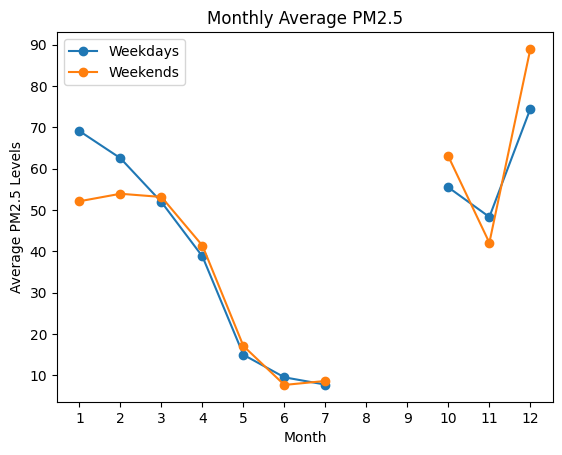

In [114]:
data2021 = pd.read_csv("Data.csv")
data2021 = data[(data['Timestamp'].dt.year == 2021) & (data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')].copy()
data2021['DayOfWeek'] = data2021['Timestamp'].dt.dayofweek
data2021['Weekend'] = data2021['DayOfWeek'] >= 5
data2021['Month'] = data2021['Timestamp'].dt.month
weekdays = data2021[~data2021['Weekend']].groupby('Month')['PM2.5'].mean()
weekend = data2021[data2021['Weekend']].groupby('Month')['PM2.5'].mean()
plt.plot(weekdays.index, weekdays.values, label='Weekdays', marker='o')
plt.plot(weekend.index, weekend.values, label='Weekends', marker='o')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.title('Monthly Average PM2.5')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

# Spatio-temporal aggregation

Question 1

In [115]:
print("Output 1: Data after converting 'Timestamp' to datetime format")
print(df_data.head())
df_2022 = df_data[df_data["Timestamp"].dt.year == 2022].copy()
print("\nOutput 2: Data filtered for the year 2022")
print(df_2022.head())
df_2022.loc[:, "Month"] = df_2022["Timestamp"].dt.month
print("\nOutput 3: Data after extracting month from Timestamp")
print(df_2022.head())
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]
df_summer = df_2022[df_2022["Month"].isin(summer_months)]
summer_avg = df_summer.groupby("state")["PM2.5"].mean()
print("\nOutput 4: Data filtered for summer months (March-May)")
print(df_summer.head())
df_monsoon = df_2022[df_2022["Month"].isin(monsoon_months)]
monsoon_avg = df_monsoon.groupby("state")["PM2.5"].mean()
print("\nOutput 5: Data filtered for monsoon months (June-September)")
print(df_monsoon.head())
pm25_change = ((monsoon_avg - summer_avg) / summer_avg) * 100
print("\nOutput 6: Percentage change in PM2.5 levels for each state")
print(pm25_change)
max_change_state = pm25_change.abs().idxmax()
max_change_value = pm25_change[max_change_state]
print("\nFinal Output: State with highest percentage change in PM2.5 levels")
print(f"State: {max_change_state}, Percentage Change: {max_change_value:.2f}%")


Output 1: Data after converting 'Timestamp' to datetime format
   Timestamp                       station  PM2.5       PM10  \
0 2017-01-01    32Bungalows, Bhilai - CECB    NaN        NaN   
1 2017-01-01          AIIMS, Raipur - CECB    NaN        NaN   
2 2017-01-01  Adarsh Nagar, Jaipur - RSPCB    NaN        NaN   
3 2017-01-01    Airoli, Navi Mumbai - MPCB    NaN  54.743723   
4 2017-01-01    Airport Area, Indore - IMC    NaN        NaN   

                                             address         city   latitude  \
0  Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...       Bhilai  21.194815   
1  All India Institute Of Medical Science, Gate N...       Raipur  21.258815   
2  Psychiatric Centre, Janta Colony, Govind Marg,...       Jaipur  26.902909   
3                                                NaN  Navi Mumbai  19.149400   
4                                                NaN          NaN        NaN   

   longitude         state        Date  Year  
0  81.314770  Chhattisga

Question 2

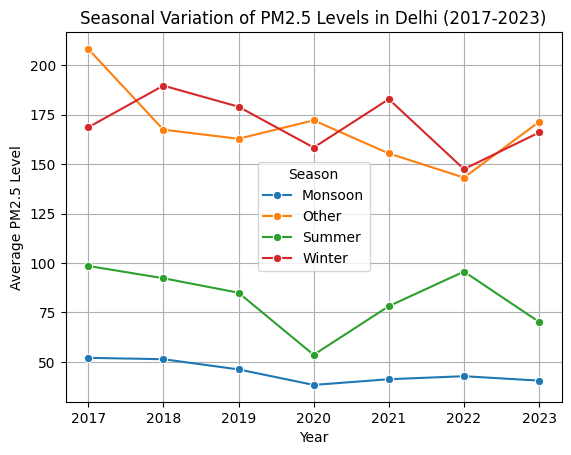

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


winter_months = [12, 1, 2]
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

df_delhi = df_data[df_data["state"] == "Delhi"].copy()

df_delhi.loc[:, "Year"] = df_delhi["Timestamp"].dt.year
df_delhi.loc[:, "Month"] = df_delhi["Timestamp"].dt.month

def get_season(month):
    if month in winter_months:
        return "Winter"
    elif month in summer_months:
        return "Summer"
    elif month in monsoon_months:
        return "Monsoon"
    return "Other"

df_delhi.loc[:, "Season"] = df_delhi["Month"].apply(get_season)

df_delhi = df_delhi[(df_delhi["Year"] >= 2017) & (df_delhi["Year"] <= 2023)]

seasonal_pm25 = df_delhi.groupby(["Year", "Season"])["PM2.5"].mean().reset_index()

sns.lineplot(data=seasonal_pm25, x="Year", y="PM2.5", hue="Season", marker="o")

plt.title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.legend(title="Season")
plt.grid(True)
plt.show()


Winter has the highest PM2.5 levels, while monsoon has the lowest due to rain. Summer and other seasons show moderate pollution.

Question 3

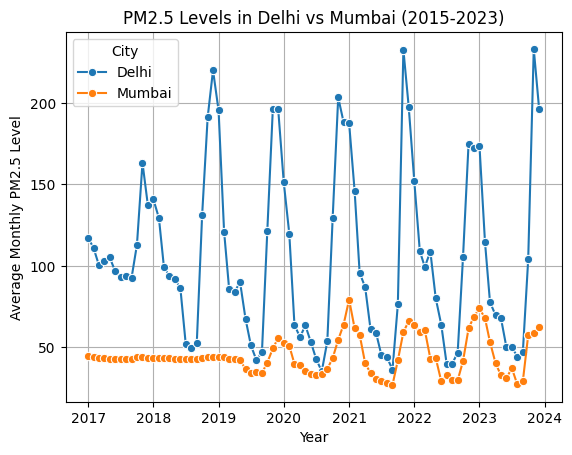

In [117]:

df_cities = df_data[df_data["city"].isin(["Delhi", "Mumbai"])].copy()

df_cities["PM2.5"] = df_cities["PM2.5"].fillna(df_cities.groupby("city")["PM2.5"].transform("mean"))

df_cities.loc[:, "Year"] = df_cities["Timestamp"].dt.year
df_cities.loc[:, "Month"] = df_cities["Timestamp"].dt.month

df_cities = df_cities[(df_cities["Year"] >= 2015) & (df_cities["Year"] <= 2023)]

df_monthly = df_cities.groupby(["Year", "Month", "city"])["PM2.5"].mean().reset_index()

df_monthly["Date"] = pd.to_datetime(df_monthly[["Year", "Month"]].assign(day=1))

sns.lineplot(data=df_monthly, x="Date", y="PM2.5", hue="city", marker="o")

plt.title("PM2.5 Levels in Delhi vs Mumbai (2015-2023)")
plt.xlabel("Year")
plt.ylabel("Average Monthly PM2.5 Level")
plt.legend(title="City")
plt.grid(True)
plt.show()


Delhi had more fluctuations in PM2.5 levels compared to Mumbai, with higher variability and sharp seasonal peaks observed in the data.

# Population-Based

Question 1

In [118]:
df_state.rename(columns={"State": "state", "Population": "population"}, inplace=True)

df_data.dropna(subset=["state", "station"], inplace=True)
df_state.dropna(subset=["state", "population"], inplace=True)

df_station_counts = df_data.groupby("state")["station"].nunique().reset_index()
df_station_counts.rename(columns={"station": "station_count"}, inplace=True)

df_combined = df_station_counts.merge(df_state, on="state", how="inner")

df_combined["stations_per_million"] = df_combined["station_count"] / (df_combined["population"] / 1_000_000)

max_state = df_combined.loc[df_combined["stations_per_million"].idxmax(), ["state", "stations_per_million"]]

print("State with highest monitoring stations relative to population:")
print(max_state)

State with highest monitoring stations relative to population:
state                   Chandigarh
stations_per_million       2.84239
Name: 4, dtype: object


Question 2

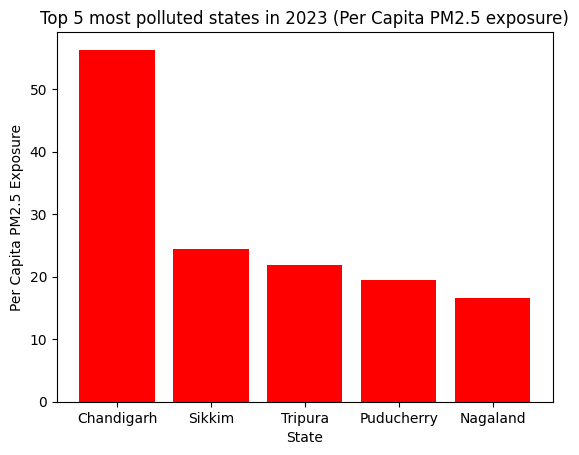

In [119]:
df_2023 = df_data[df_data["Timestamp"].dt.year == 2023]

df_2023 = df_2023.dropna(subset=["state", "PM2.5"])
df_state = df_state.dropna(subset=["state", "population"])

df_pm25_avg = df_2023.groupby("state")["PM2.5"].mean().reset_index()

df_combined = df_pm25_avg.merge(df_state, left_on="state", right_on="state", how="inner")

df_combined["pm25_per_capita"] = df_combined["PM2.5"] / (df_combined["population"] / 1_000_000)

top_5_polluted = df_combined.nlargest(5, "pm25_per_capita")

plt.bar(top_5_polluted["state"], top_5_polluted["pm25_per_capita"], color='red')
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 most polluted states in 2023 (Per Capita PM2.5 exposure)")
plt.show()


Based on the bar chart, the top 5 states with the highest per capita PM2.5 exposure in 2023 experienced the most significant pollution levels relative to their population.

Question 3

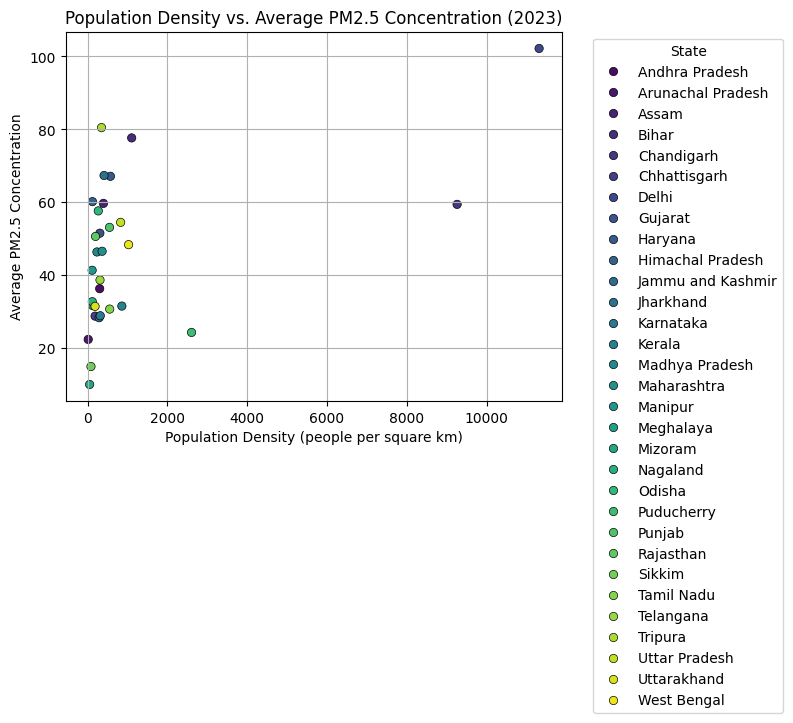

In [120]:
df_state["Population Density"] = df_state["population"] / df_state["Area (km2)"]
df_2023 = df_data[df_data["Timestamp"].dt.year == 2023]

df_2023 = df_2023.dropna(subset=["state", "PM2.5"])
df_state = df_state.dropna(subset=["state", "Population Density"])

df_pm25_avg = df_2023.groupby("state")["PM2.5"].mean().reset_index()

df_combined = df_pm25_avg.merge(df_state, left_on="state", right_on="state", how="inner")

sns.scatterplot(x=df_combined["Population Density"], y=df_combined["PM2.5"], hue=df_combined["state"], palette="viridis", edgecolor="black")
plt.xlabel("Population Density (people per square km)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Population Density vs. Average PM2.5 Concentration (2023)")
plt.grid(True)

plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

Based on the scatter plot, there appears to be a positive correlation between population density and PM2.5 concentration. States with higher population density generally exhibit higher pollution levels, though some variations exist.

# Area Based

Question 1

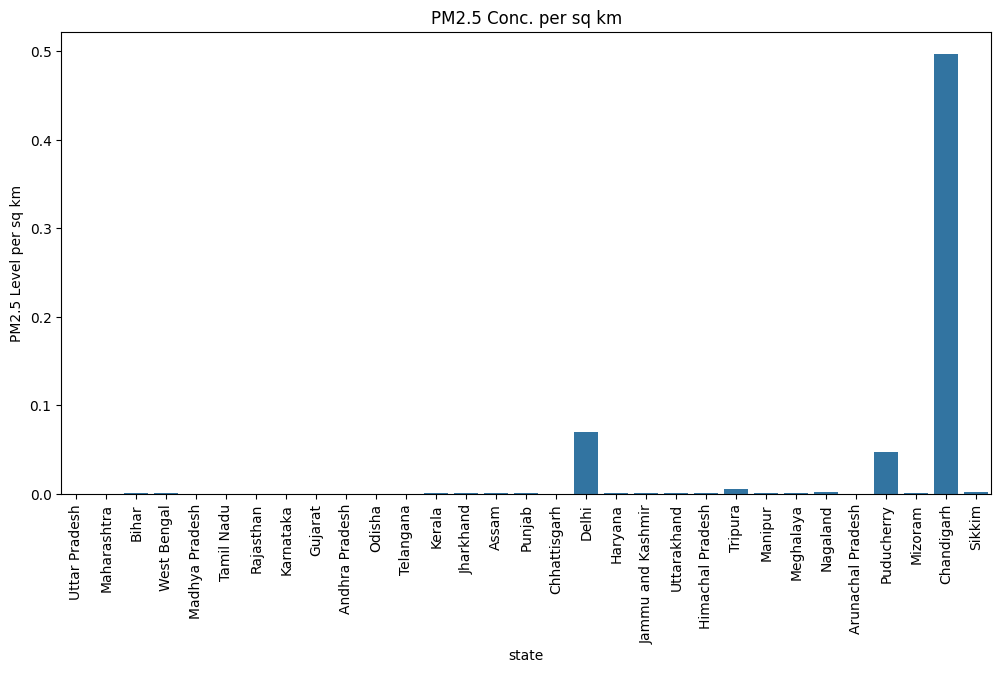

In [121]:
needdata = pd.merge(df_state, df_data.groupby('state')['PM2.5'].mean(), on = 'state')
plt.figure(figsize = (12, 6))
sns.barplot(x = needdata['state'], y = (needdata['PM2.5']/needdata['Area (km2)']))
plt.xticks(rotation = 90)
plt.ylabel('PM2.5 Level per sq km')
plt.title('PM2.5 Conc. per sq km')
plt.show()


The state with the highest PM2.5 concentration per square kilometer is Chandigarh.

Question 2

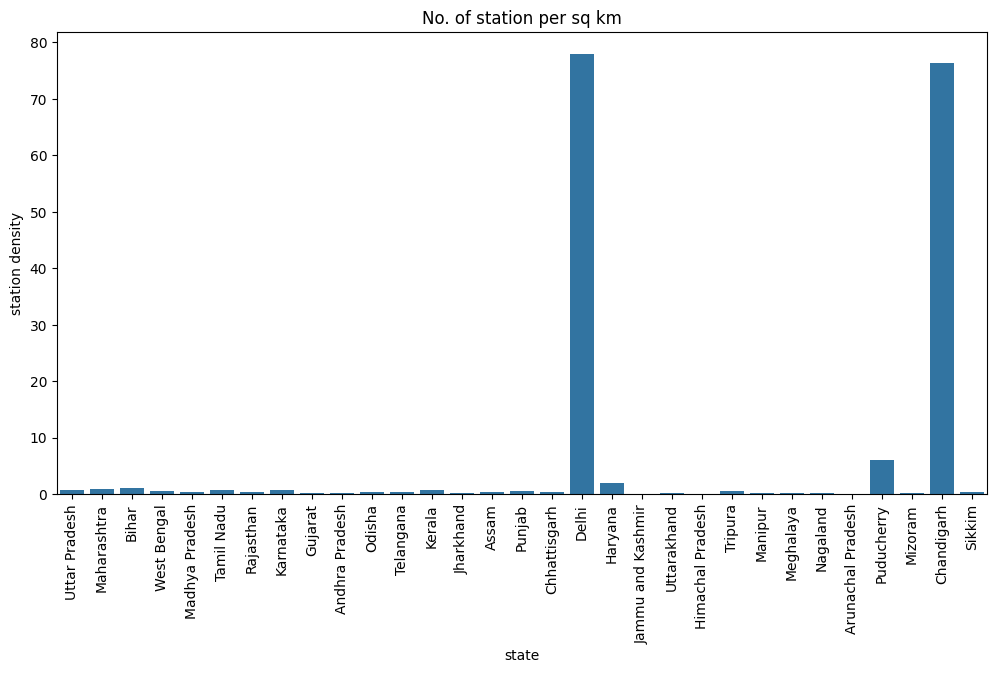

In [122]:
need_data = pd.merge(df_state, df_data.groupby('state')['station'].count(), on = 'state')
need_data['station density'] = need_data['station'] / need_data['Area (km2)']
plt.figure(figsize = (12, 6))
sns.barplot(data = need_data, x = 'state', y = 'station density')
plt.xticks(rotation = 90)
plt.title('No. of station per sq km')
plt.show()

The state with the highest density of monitoring stations relative to its area is Delhi

Question 3

Average PM2.5 levels for Maharashtra and Madhya Pradesh:
            state      PM2.5
0  Madhya Pradesh  47.095952
1     Maharashtra  46.440044

State data with population density:
            state  population  Area (km2)  Population Density
1     Maharashtra   112374333      307713          365.192023
4  Madhya Pradesh    72626809      308252          235.608557


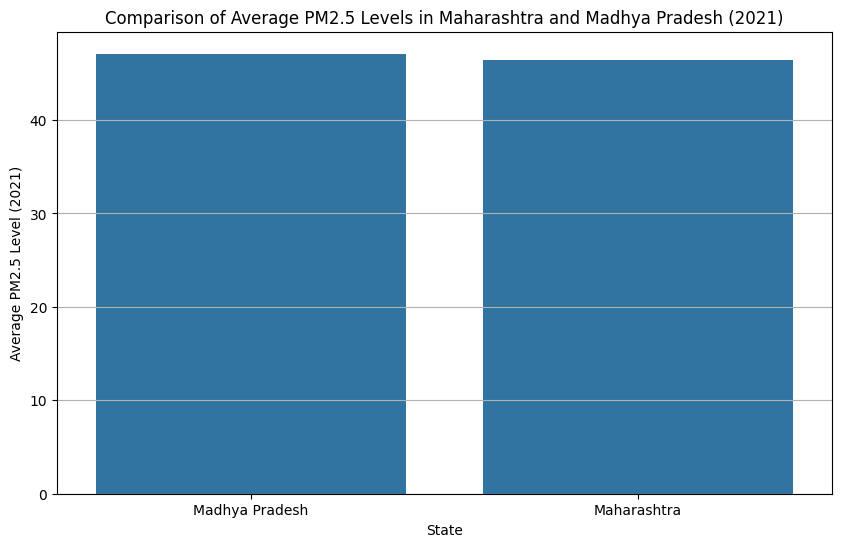

In [123]:
df_state["Population Density"] = df_state["population"] / df_state["Area (km2)"]
df_2021 = df_data[df_data["Timestamp"].dt.year == 2021]
df_2021 = df_2021.dropna(subset=["state", "PM2.5"])
df_state = df_state.dropna(subset=["state", "Population Density", "Area (km2)"])
df_2021_filtered = df_2021[df_2021["state"].isin(["Maharashtra", "Madhya Pradesh"])]
df_pm25_avg = df_2021_filtered.groupby("state")["PM2.5"].mean().reset_index()
df_combined = df_pm25_avg.merge(df_state, on="state", how="inner")
print("Average PM2.5 levels for Maharashtra and Madhya Pradesh:")
print(df_pm25_avg)
print("\nState data with population density:")
print(df_state[df_state["state"].isin(["Maharashtra", "Madhya Pradesh"])] )
plt.figure(figsize=(10, 6))
sns.barplot(x="state", y="PM2.5", data=df_combined,  legend=False)
plt.xlabel("State")
plt.ylabel("Average PM2.5 Level (2021)")
plt.title("Comparison of Average PM2.5 Levels in Maharashtra and Madhya Pradesh (2021)")
plt.grid(axis="y")
plt.show()

Madhya Pradesh and Maharashtra have similar land areas, but despite Maharashtra's higher population density, their PM2.5 levels are nearly the same. This suggests that factors beyond population density, such as industrialization and emissions, significantly impact pollution levels.

 # Funding Based

Question 1

In [124]:
NCAP_funding_recieved2021 = df_funding[df_funding["Amount released during FY 2021-22"] != "-"]
NCAP_funding_notrecieved2021 = df_funding[df_funding["Amount released during FY 2021-22"] == "-"]
merged_recieved = df_data.merge(NCAP_funding_recieved2021,left_on= "state",right_on = "State")
merged_notrecieved = df_data.merge(NCAP_funding_notrecieved2021,left_on ="state",right_on = "State")

avg_PM_recieved = merged_recieved.groupby("state")["PM2.5"].mean()

avg_PM_notrecieved = merged_notrecieved.groupby("state")["PM2.5"].mean()
print("average PM2.5 levels between states that received NCAP funding in 2021")

print(avg_PM_recieved)
print()

print("average PM2.5 levels between states that did not received NCAP funding in 2021")
print(avg_PM_notrecieved)

average PM2.5 levels between states that received NCAP funding in 2021
state
Andhra Pradesh       35.049347
Bihar                76.918759
Chandigarh           56.666803
Delhi               104.100918
Himachal Pradesh     62.516878
Karnataka            28.894840
Madhya Pradesh       45.874375
Maharashtra          43.491415
Meghalaya            24.513390
Nagaland             33.439550
Odisha               52.109504
Telangana            38.114469
Uttar Pradesh        70.893996
Uttarakhand          36.788767
Name: PM2.5, dtype: float64

average PM2.5 levels between states that did not received NCAP funding in 2021
state
Andhra Pradesh    35.049347
Assam             57.962372
Bihar             76.918759
Chhattisgarh      28.761571
Gujarat           52.462657
Jharkhand         54.281545
Karnataka         28.894840
Madhya Pradesh    45.874375
Maharashtra       43.491415
Odisha            52.109504
Punjab            52.243166
Rajasthan         54.230341
Tamil Nadu        31.289620
Telangana  

Question 2

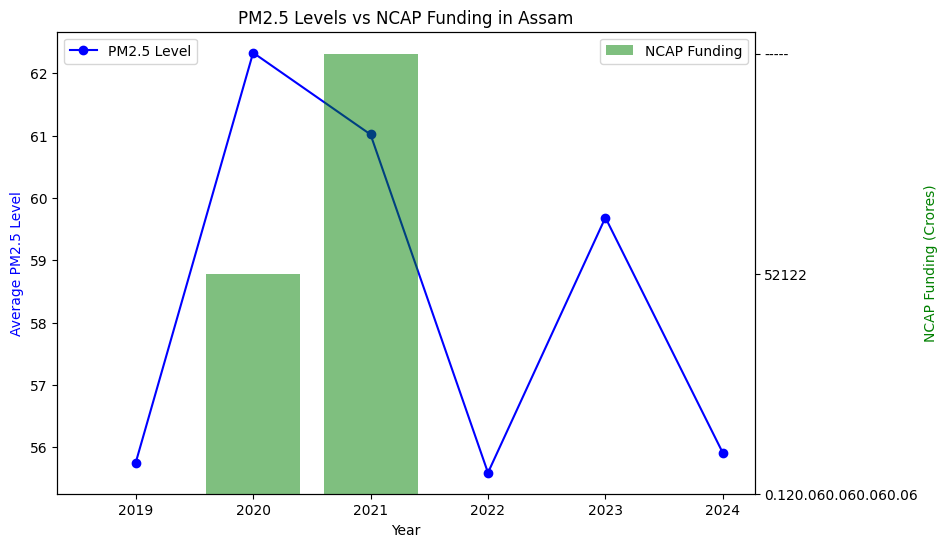

In [125]:
df_assam = df_data[df_data["state"] == "Assam"]
df_assam = df_assam.dropna(subset=["PM2.5"])
df_assam["Year"] = df_assam["Timestamp"].dt.year
df_pm25_avg = df_assam.groupby("Year")["PM2.5"].mean().reset_index()

df_funding_assam = df_funding[df_funding["State"] == "Assam"]
funding_years = [2019, 2020, 2021]
funding_amounts = [
    df_funding_assam["Amount released during FY 2019-20"].sum(),
    df_funding_assam["Amount released during FY 2020-21"].sum(),
    df_funding_assam["Amount released during FY 2021-22"].sum()
]

df_funding_series = pd.DataFrame({"Year": funding_years, "Funding": funding_amounts})
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()

ax1.plot(df_pm25_avg["Year"], df_pm25_avg["PM2.5"], marker='o', color='b', label='PM2.5 Level')
ax2.bar(df_funding_series["Year"], df_funding_series["Funding"], color='g', alpha=0.5, label='NCAP Funding')

ax1.set_xlabel("Year")
ax1.set_ylabel("Average PM2.5 Level", color='b')
ax2.set_ylabel("NCAP Funding (Crores)", color='g')
plt.title("PM2.5 Levels vs NCAP Funding in Assam")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Question 3

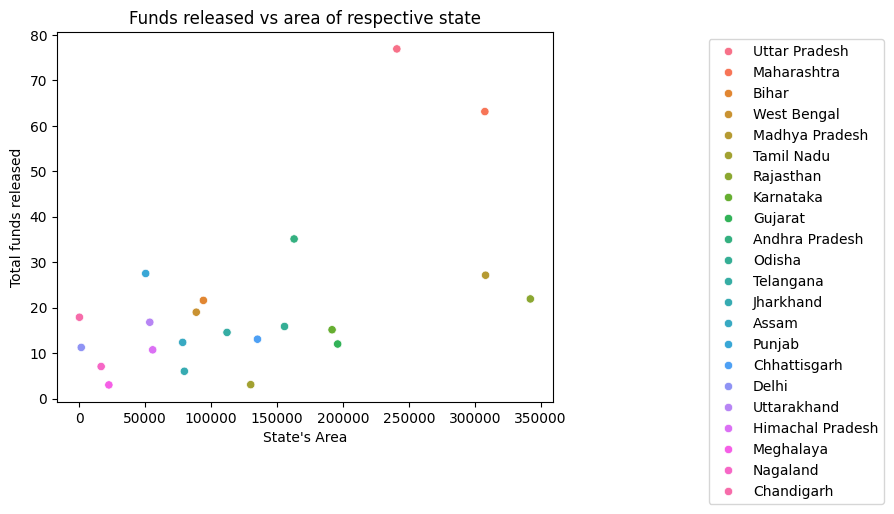

In [126]:
final_df = pd.merge(df_state,df_funding.groupby('State')['Total fund released'].sum(), left_on = 'state',right_on = 'State')
sns.scatterplot(data = final_df,x = "Area (km2)",y = 'Total fund released',hue = "state")
plt.title("Funds released vs area of respective state")
plt.xlabel("State's Area")
plt.ylabel("Total funds released")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# Miscellaneous Questions

Question 1

In [127]:
data_PM = df_data
data_PM["Timestamp"] = pd.to_datetime(data_PM["Timestamp"])

data_2023 = data_PM[data_PM["Timestamp"].dt.year == 2023]

grouped_data_city = data_2023.groupby("city")["PM2.5"].mean().reset_index()
most_polluted_city = grouped_data_city.loc[grouped_data_city["PM2.5"].idxmax(), "city"]

city_data = data_2023[data_2023["city"] == most_polluted_city].copy()

city_data["Date"] = city_data["Timestamp"].dt.date  
daily_max_pm25 = city_data.groupby("Date")["PM2.5"].max() 
total_days = daily_max_pm25.count()
hazardous_days = (daily_max_pm25 > 300).sum()

hazardous_percentage = (hazardous_days / total_days) * 100

print("Most polluted city in 2023 is", most_polluted_city)
print("Percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³) is",hazardous_percentage)

Most polluted city in 2023 is Darbhanga
Percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³) is 23.076923076923077


Question 2

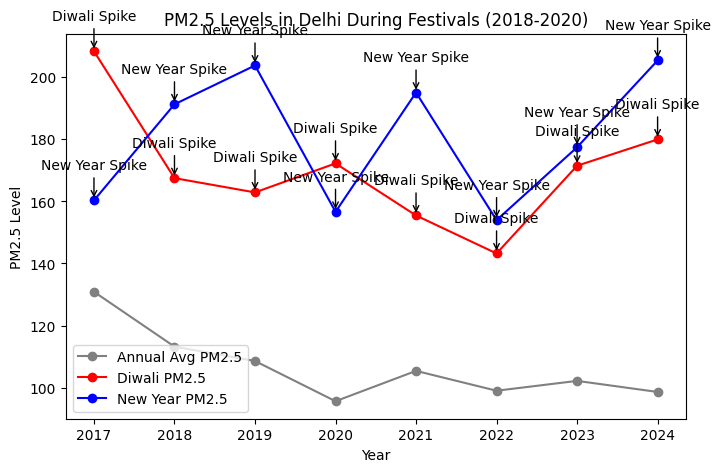

In [128]:
df_delhi = df_data[df_data["state"] == "Delhi"]
df_delhi = df_delhi.dropna(subset=["PM2.5"])
df_delhi["Month"] = df_delhi["Timestamp"].dt.month
df_delhi["Year"] = df_delhi["Timestamp"].dt.year
diwali_months = [10, 11] 
new_year_month = [1] 
df_diwali = df_delhi[df_delhi["Month"].isin(diwali_months)].groupby("Year")["PM2.5"].mean().reset_index()
df_new_year = df_delhi[df_delhi["Month"].isin(new_year_month)].groupby("Year")["PM2.5"].mean().reset_index()
df_annual = df_delhi.groupby("Year")["PM2.5"].mean().reset_index()
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_annual["Year"], df_annual["PM2.5"], marker='o', linestyle='-', label='Annual Avg PM2.5', color='gray')
ax.plot(df_diwali["Year"], df_diwali["PM2.5"], marker='o', linestyle='-', label='Diwali PM2.5', color='r')
ax.plot(df_new_year["Year"], df_new_year["PM2.5"], marker='o', linestyle='-', label='New Year PM2.5', color='b')
for year in df_diwali["Year"]:
    diwali_value = df_diwali[df_diwali["Year"] == year]["PM2.5"].values[0]
    annual_value = df_annual[df_annual["Year"] == year]["PM2.5"].values[0]
    if diwali_value > annual_value:
        ax.annotate("Diwali Spike", xy=(year, diwali_value), xytext=(year, diwali_value + 10),
                    arrowprops=dict(facecolor='red', arrowstyle='->'), ha='center')

for year in df_new_year["Year"]:
    new_year_value = df_new_year[df_new_year["Year"] == year]["PM2.5"].values[0]
    annual_value = df_annual[df_annual["Year"] == year]["PM2.5"].values[0]
    if new_year_value > annual_value:
        ax.annotate("New Year Spike", xy=(year, new_year_value), xytext=(year, new_year_value + 10),
                    arrowprops=dict(facecolor='blue', arrowstyle='->'), ha='center')
ax.set_xlabel("Year")
ax.set_ylabel("PM2.5 Level")
plt.title("PM2.5 Levels in Delhi During Festivals (2018-2020)")
ax.legend()
plt.show()


Question 3

the highest funded state in 2020 is Assam


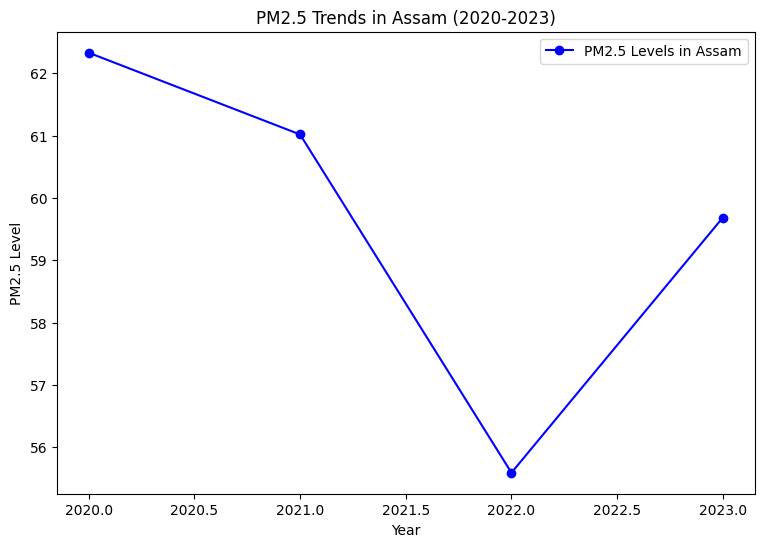

In [129]:
highest_funded_state = df_funding.loc[df_funding["Amount released during FY 2020-21"].idxmax(), "State"]
print(f"the highest funded state in 2020 is {highest_funded_state}")
df_state = df_data[df_data["state"] == highest_funded_state]
df_state = df_state.dropna(subset=["PM2.5"])
df_state["Year"] = df_state["Timestamp"].dt.year
df_pm25_trends = df_state.groupby("Year")["PM2.5"].mean().reset_index()
df_pm25_trends = df_pm25_trends[df_pm25_trends["Year"].between(2020, 2023)]
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(df_pm25_trends["Year"], df_pm25_trends["PM2.5"], marker='o', linestyle='-', color='b', label=f'PM2.5 Levels in {highest_funded_state}')
ax.set_xlabel("Year")
ax.set_ylabel("PM2.5 Level")
plt.title(f"PM2.5 Trends in {highest_funded_state} (2020-2023)")
ax.legend()
plt.show()

Assam, the highest NCAP-funded state in 2020, saw a decline in PM2.5 levels until 2022, but levels rose again in 2023.

Question 4

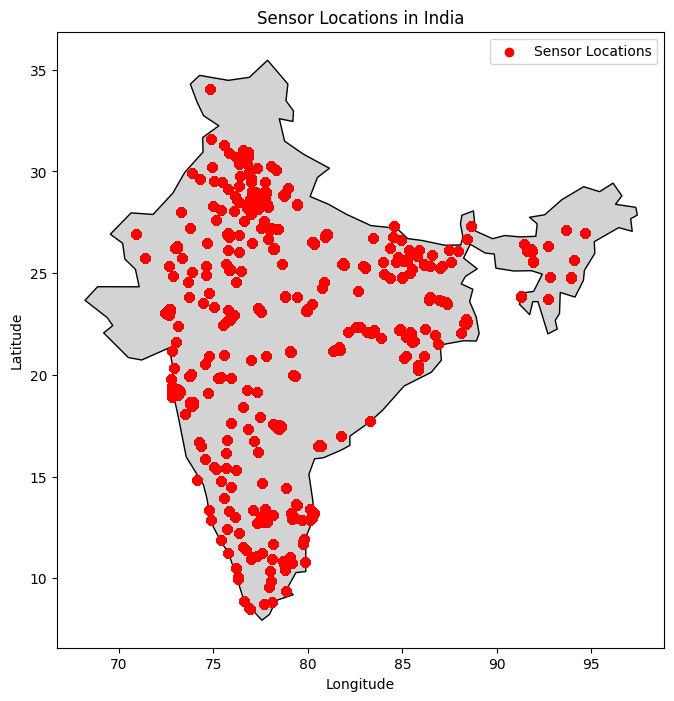

In [130]:
import geopandas as gpd
df_sensors = df_data.dropna(subset=["latitude", "longitude"])
world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")
india_map = world[world["NAME"] == "India"]
fig, ax = plt.subplots(figsize=(10, 8))
india_map.plot(ax=ax, color="lightgray", edgecolor="black")  # Plot India map
ax.scatter(df_sensors["longitude"], df_sensors["latitude"], 
           color='red', marker='o', label='Sensor Locations')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Sensor Locations in India")
ax.legend()
plt.show()


# Extra Questions

Question 1: Are there gaps in the spatial coverage of air quality stations? If so, where should new stations be placed?

Question 2: Can we identify the least polluted travel route between two locations in a city using air quality stations?

Inference from the assignment: From the below code we can see that the declination of PM2.5 Level led to declination of funds raised to the states, but still there is no significant declination in PM10 Levels.